### Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset

In [2]:
data = pd.read_csv(r'D:\Study Materials\Projects\energy_production.csv',sep=';')

In [3]:
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


#### Data Description

The variables, or features, are the following:
* temperature, in degrees Celsius.
* exhaust_vacuum, in cm Hg.
* Ambient pressure  (amb_pressure) in millibar.
* Relative humidity (r_humidity) in percentage.,
* energy_production, in MW, net hourly electrical energy output.


#### Initial Analysis

In [4]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

#### There is no null values present in the given dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### All the data is of float datatype 

In [6]:
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


* Temperature variable ranges between 1.81 C - 37.11 C
* Exhaust vaccum variable ranges between 25.36 Hg - 81.56 Hg
* Ambient Pressure variable ranges between 992.89 millibar - 1033.30 millibar
* Relative Humidity variable ranges between 25.56 % - 100.16% 

### Exploratory Data Analysis

## Understanding Each Variable and Distribution

### Temperature 

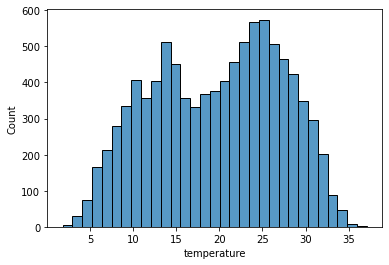

In [7]:
sns.histplot(data['temperature'])
plt.show()

In [8]:
data['temperature'].describe()

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: temperature, dtype: float64

In [9]:
data['temperature'].skew()

-0.1363930494749227

* Majority of the Temperature value falls between 13.51 to 25.72 
* The observations are concentrated around the mean
* Negatively skewed data indicates that extreme values are located towards the left and most of the values are present to the right of the mean
* Histogram shows a normal distribution

### Exhaust Vaccum

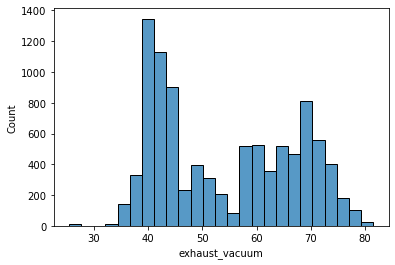

In [10]:
sns.histplot(data['exhaust_vacuum'])
plt.show()

In [11]:
data['exhaust_vacuum'].describe()

count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: exhaust_vacuum, dtype: float64

In [12]:
data['exhaust_vacuum'].skew()

0.19852101136676173

* Majority of the Exhaust Vaccum value falls between 41.74 to 66.54 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Ambient Pressure

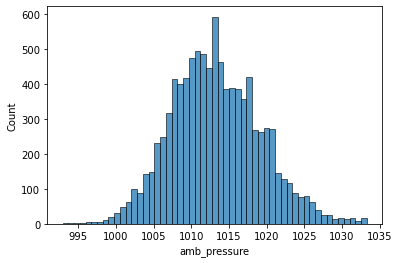

In [13]:
sns.histplot(data['amb_pressure'])
plt.show()

In [14]:
data['amb_pressure'].describe()

count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: amb_pressure, dtype: float64

In [15]:
data['amb_pressure'].skew()

0.26544469358258616

* Majority of the Exhaust Vaccum value falls between 1009.100 to 1017.260 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Relative Humidity

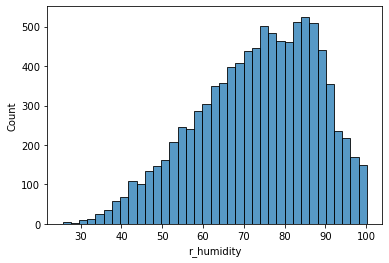

In [16]:
sns.histplot(data['r_humidity'])
plt.show()

In [17]:
data['r_humidity'].describe()

count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: r_humidity, dtype: float64

In [18]:
data['r_humidity'].skew()

-0.4318387491833359

* Majority of the Exhaust Vaccum value falls between 63.327 to 84.830 
* The observations are concentrated around the mean
* Negatively skewed data indicates that extreme values are located towards the left and most of the values are present to the right of the mean
* Histogram shows a normal distribution

### Energy Production

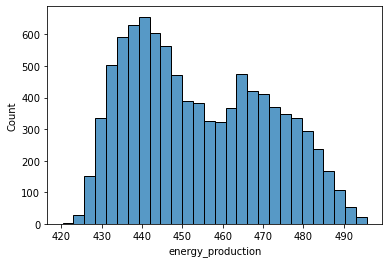

In [19]:
sns.histplot(data['energy_production'])
plt.show()

In [20]:
data['energy_production'].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: energy_production, dtype: float64

In [21]:
data['energy_production'].skew()

0.30650943542040227

* Majority of the Exhaust Vaccum value falls between 439.750 to 468.430 
* The observations are concentrated around the mean
* Positively skewed data indicates that extreme values are located towards the right and most of the values are present to the left of the mean
* Histogram shows a normal distribution

### Check For Outliers 

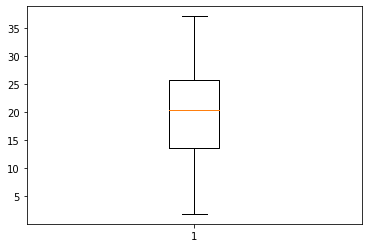

In [22]:
plt.boxplot(x='temperature',data=data)
plt.show()

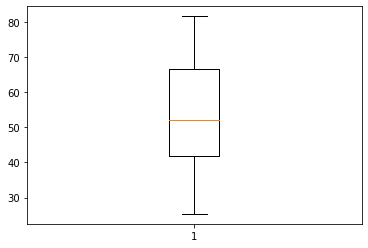

In [23]:
plt.boxplot(x='exhaust_vacuum',data=data)
plt.show()

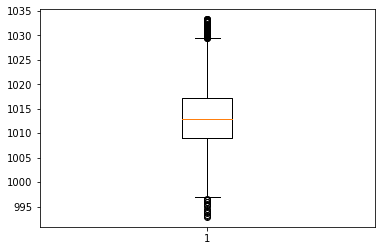

In [24]:
plt.boxplot(x='amb_pressure',data=data)
plt.show()

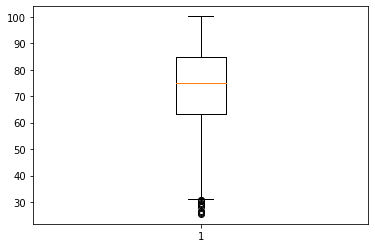

In [25]:
plt.boxplot(x='r_humidity',data=data)
plt.show()

#### Observation : There are no outliers present in temperature and exhaust vaccum and a few outliers are present in ambient pressure and relative humidity variable 

### Assumption Check for Data

#### 1. Check for Linearity 

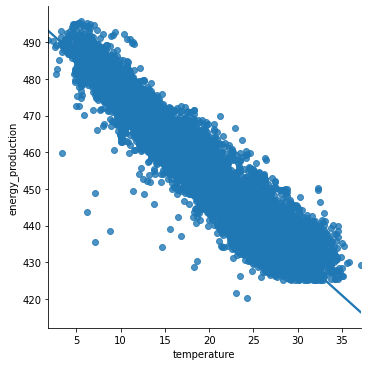

In [26]:
sns.lmplot(x='temperature',y='energy_production',data=data)
plt.show()

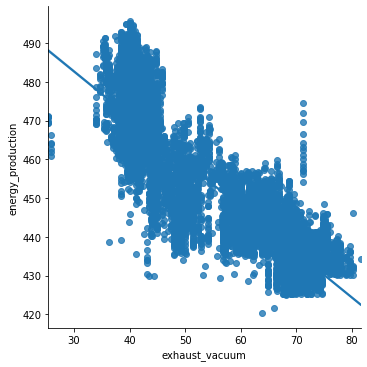

In [27]:
sns.lmplot(x='exhaust_vacuum',y='energy_production',data=data)
plt.show()

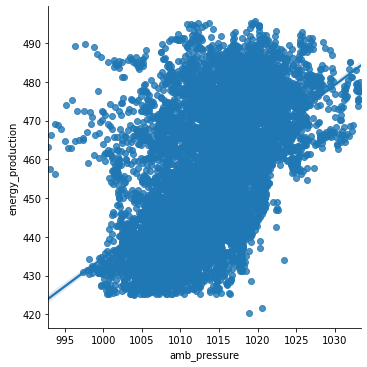

In [28]:
sns.lmplot(x='amb_pressure',y='energy_production',data=data)
plt.show()

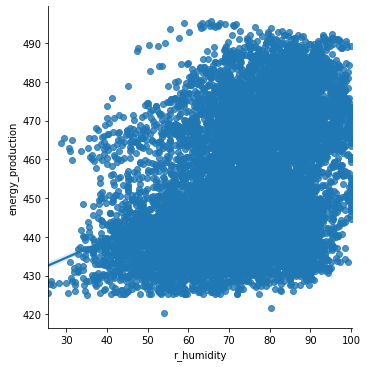

In [29]:
sns.lmplot(x='r_humidity',y='energy_production',data=data)
plt.show()

#### Observation : All of the input features are linearly co-related with my output

#### 2. Check for Normality Test

#### Normality Check with qqplot

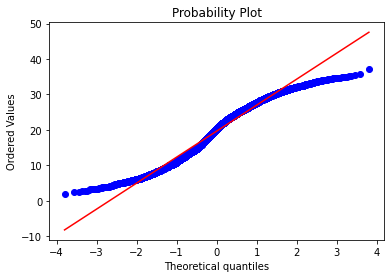

In [30]:
stats.probplot(x = data['temperature'],dist='norm',plot=plt)
plt.show()

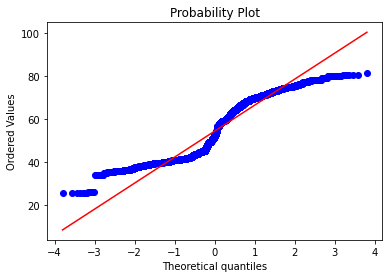

In [31]:
stats.probplot(x = data['exhaust_vacuum'],dist='norm',plot=plt)
plt.show()

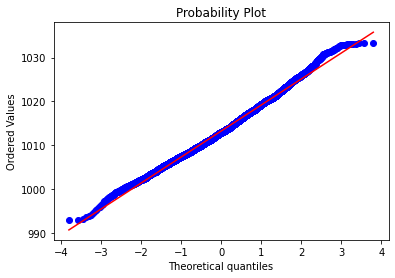

In [32]:
stats.probplot(x = data['amb_pressure'],dist='norm',plot=plt)
plt.show()

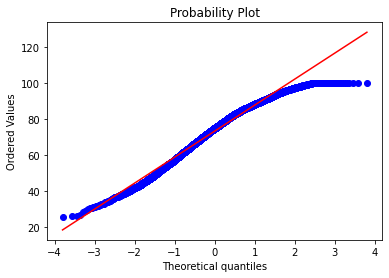

In [33]:
stats.probplot(x = data['r_humidity'],dist='norm',plot=plt)
plt.show()

#### Observation : Ambient_pressure and Relative Humidity pass the normality test 

#### 3. Check for Multi Collinearity

In [34]:
corr_matrix = data.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


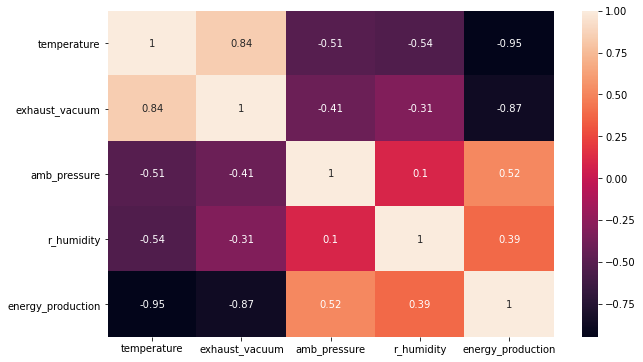

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

* Collinearity between temperature and exhaust vaccum

#### 4. No Auto Regression -  Test Passed 

In [36]:
energy_data = data.copy()

In [37]:
energy_data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


#### Dividing the data into train and test data and also as X(dependent variable) and Y ( Target Variable)

In [38]:
X = energy_data.iloc[:,:-1]
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [39]:
Y = energy_data.loc[:,'energy_production']
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9568, dtype: float64

#### Dividing the training data as 70% and testing data as 30%

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.7,random_state=21)

In [41]:
x_train.shape,y_train.shape

((2870, 4), (2870,))

In [42]:
x_test.shape,y_test.shape

((6698, 4), (6698,))

#### Using Standard Scaler for converting the variables to similar dimensions

In [43]:
x_train.mean()

temperature         19.749801
exhaust_vacuum      54.222038
amb_pressure      1013.194181
r_humidity          72.937997
dtype: float64

In [44]:
x_train.std()

temperature        7.359693
exhaust_vacuum    12.634496
amb_pressure       5.945344
r_humidity        14.667047
dtype: float64

In [45]:
x_train.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], dtype='object')

In [46]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_train)
x_scaled

array([[-2.22192006, -1.15434599, -0.35230025,  0.71546997],
       [ 0.63467486,  0.71942289, -0.09322888, -0.07760218],
       [ 1.03693561,  1.57833257, -0.52389297,  0.38678487],
       ...,
       [-0.64141583, -0.8321559 ,  1.99784716,  0.70319543],
       [ 0.50828888, -0.53608934, -0.7964226 , -0.46084083],
       [ 1.70012226,  1.54033473,  0.26173254, -0.82089422]])

In [47]:
x_scaled_df = pd.DataFrame(data=x_scaled,columns=['Temperature','Exhaust_vacuum','Ambient_pressure','Relative_humidity'])
x_scaled_df

,Temperature,Exhaust_vacuum,Ambient_pressure,Relative_humidity
0,-2.221920,-1.154346,-0.352300,0.715470
1,0.634675,0.719423,-0.093229,-0.077602
2,1.036936,1.578333,-0.523893,0.386785
3,-1.504374,-0.981772,3.303298,0.046507
4,0.553136,0.785919,1.306429,-0.874766
...,...,...,...,...
2865,0.137285,1.306015,-0.582773,1.098027
2866,0.487904,-0.681748,-0.078088,0.078557
2867,-0.641416,-0.832156,1.997847,0.703195
2868,0.508289,-0.536089,-0.796423,-0.460841


In [48]:
x_scaled_df.mean()

Temperature         -3.249433e-18
Exhaust_vacuum      -2.294719e-16
Ambient_pressure     1.867865e-14
Relative_humidity   -7.028834e-17
dtype: float64

In [49]:
x_scaled_df.std()

Temperature          1.000174
Exhaust_vacuum       1.000174
Ambient_pressure     1.000174
Relative_humidity    1.000174
dtype: float64

### Model Training

In [50]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_scaled_df,y_train)

LinearRegression()

In [51]:
linear_model.intercept_

454.205456445993

In [52]:
linear_model.coef_

array([-14.06353996,  -3.1017063 ,   0.50778918,  -2.24951831])

### Model Testing 

In [53]:
y_energy_pred = linear_model.predict(x_scaled_df)
y_energy_pred

array([487.24560315, 443.17546955, 433.59084009, ..., 465.23977097,
       449.35216219, 427.49757479])

In [54]:
error = y_train - y_energy_pred
error

3668   -27.385603
2955    -4.785470
4258     3.059160
6993    -1.370208
3663     0.750085
          ...    
9336     3.392086
48       6.577989
8964    -2.119771
5944    -2.632162
5327    -1.017575
Name: energy_production, Length: 2870, dtype: float64

#### Homoscadestacity Check

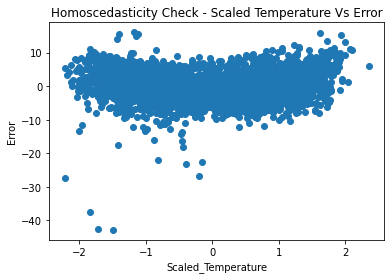

In [55]:
plt.scatter(x = x_scaled_df['Temperature'],y = error)
plt.title('Homoscedasticity Check - Scaled Temperature Vs Error')
plt.xlabel('Scaled_Temperature')
plt.ylabel('Error')
plt.show()

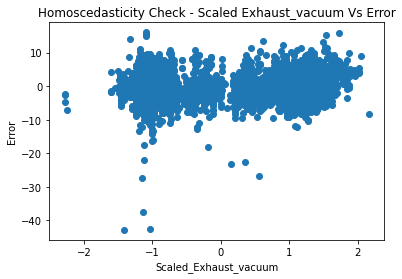

In [56]:
plt.scatter(x = x_scaled_df['Exhaust_vacuum'],y = error)
plt.title('Homoscedasticity Check - Scaled Exhaust_vacuum Vs Error')
plt.xlabel('Scaled_Exhaust_vacuum')
plt.ylabel('Error')
plt.show()

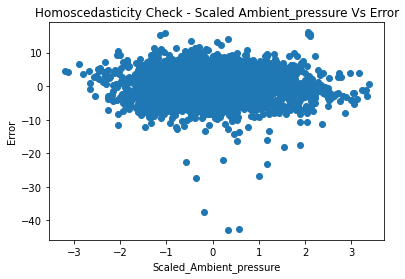

In [57]:
plt.scatter(x = x_scaled_df['Ambient_pressure'],y = error)
plt.title('Homoscedasticity Check - Scaled Ambient_pressure Vs Error')
plt.xlabel('Scaled_Ambient_pressure')
plt.ylabel('Error')
plt.show()

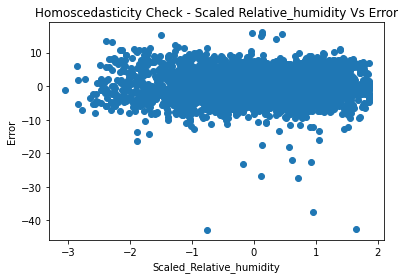

In [58]:
plt.scatter(x = x_scaled_df['Relative_humidity'],y = error)
plt.title('Homoscedasticity Check - Scaled Relative_humidity Vs Error')
plt.xlabel('Scaled_Relative_humidity')
plt.ylabel('Error')
plt.show()

#### Observation : None of the input variables follows Homoscedasticity , so this test failed

In [59]:
mean_squared_error(y_train,y_energy_pred)

22.853600663445487

In [60]:
mean_absolute_error(y_train,y_energy_pred)

3.719921890160913

### Model Building Using Stats Models

In [61]:
import statsmodels.formula.api as smf
lin_stats_model = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=energy_data).fit()

In [62]:
lin_stats_model.params

Intercept         454.609274
temperature        -1.977513
exhaust_vacuum     -0.233916
amb_pressure        0.062083
r_humidity         -0.158054
dtype: float64

In [63]:
lin_stats_model.pvalues

Intercept          0.000000e+00
temperature        0.000000e+00
exhaust_vacuum    4.375305e-215
amb_pressure       5.507109e-11
r_humidity        3.104584e-293
dtype: float64

In [64]:
lin_stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:22:20   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        454.6093      9.749     46.634      0.000     435.500     473.718
temperature       -1.9775      0.015   -129.342      0.000      -2.007      -1.948
exhaust_vacuum    -0.2339      0.007    -32.122      0.000      -0.248      -0.220
amb_pressure       0.0621      0.009      6.564      0.000       0.044       0.081
r_humidity        -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
print('R2 score : ',round(lin_stats_model.rsquared,3))
print('Adjusted R2 score: ',round(lin_stats_model.rsquared_adj,3)) 

R2 score :  0.929
Adjusted R2 score:  0.929


### Understanding R2 and Adjusted R2

In [66]:
model_1 = smf.ols('energy_production~temperature',data = energy_data).fit()
print('R2 score          : ',round(model_1.rsquared,4))
print('Adjusted R2 score : ',round(model_1.rsquared_adj,4))
print('AIC value         : ',round(model_1.aic,4)) 
print('BIC value         : ',round(model_1.bic,4))
#when performing model selection, the one with the lowest AIC or BIC is preferred.

R2 score          :  0.8989
Adjusted R2 score :  0.8989
AIC value         :  59516.4764
BIC value         :  59530.8088


In [67]:
model_2 = smf.ols('energy_production~temperature+exhaust_vacuum',data = energy_data).fit()
print('R2 score          : ',round(model_2.rsquared,4))
print('Adjusted R2 score : ',round(model_2.rsquared_adj,4))
print('AIC value         : ',round(model_2.aic,4)) 
print('BIC value         : ',round(model_2.bic,4))

R2 score          :  0.9157
Adjusted R2 score :  0.9157
AIC value         :  57780.8638
BIC value         :  57802.3624


In [68]:
model_3 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure',data = energy_data).fit()
print('R2 score          : ',round(model_3.rsquared,4))
print('Adjusted R2 score : ',round(model_3.rsquared_adj,4))
print('AIC value         : ',round(model_3.aic,4)) 
print('BIC value         : ',round(model_3.bic,4))

R2 score          :  0.918
Adjusted R2 score :  0.9179
AIC value         :  57524.3947
BIC value         :  57553.0594


In [69]:
model_4 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data = energy_data).fit()
print('R2 score          : ',round(model_4.rsquared,4))
print('Adjusted R2 score : ',round(model_4.rsquared_adj,4))
print('AIC value         : ',round(model_4.aic,4)) 
print('BIC value         : ',round(model_4.bic,4))

R2 score          :  0.9287
Adjusted R2 score :  0.9287
AIC value         :  56186.229
BIC value         :  56222.0599


### Model - Decision Tree 

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
y_pred_dt_train = dt_model.predict(x_train)

In [86]:
y_pred_dt_test = dt_model.predict(x_test)

#### Mean Squared Error

In [87]:
mean_squared_error(y_train,y_pred_dt_train)

0.0

#### Mean Absolute Error

In [88]:
mean_absolute_error(y_train,y_pred_dt_train)

0.0

##### Training Accuracy

In [90]:
r2_score(y_train,y_pred_dt_train)

1.0

##### Testing Accuracy

In [89]:
r2_score(y_test,y_pred_dt_test)

0.9023612197619508

### Model - Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators==100,random_state=21,max_depth=5)
rf_model.fit(x_train,y_train,)

RandomForestRegressor(max_depth=5, random_state=21)

In [128]:
y_rf_train = rf_model.predict(x_train)

In [129]:
y_rf_test = rf_model.predict(x_test)

In [130]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

##### Training Accuracy

In [131]:
r2_score(y_train,y_rf_train)

0.9402176071577831

In [132]:
mean_squared_error(y_train,y_rf_train)

16.68995973395092

In [133]:
mean_absolute_error(y_train,y_rf_train)

3.0868148958982307

##### Testing Accuracy

In [134]:
r2_score(y_test,y_rf_test)

0.9421309629205021

In [135]:
mean_squared_error(y_test,y_rf_test)

17.15293578981971

In [136]:
mean_absolute_error(y_test,y_rf_test)

3.2298862228194904

#### Hyper Parameter Tuning 

In [141]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = rf_model,
                       param_grid={'criterion': ["mse", "mae"],
                                   'max_depth' : [4,5,6,7,8,9,10]},
                                    cv=5)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=21),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [142]:
grid_cv.best_params_

{'criterion': 'mae', 'max_depth': 10}

In [143]:
rf_final_model = RandomForestRegressor(criterion='mae',max_depth=10,random_state=21)
rf_final_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, random_state=21)

In [145]:
y_pred_train_rf_final = rf_final_model.predict(x_train)
y_pred_test_rf_final = rf_final_model.predict(x_test)

##### Training Accuracy

In [146]:
r2_score(y_train,y_pred_train_rf_final)

0.9747851528291651

In [147]:
mean_squared_error(y_train,y_pred_train_rf_final)

7.039443621630652

In [148]:
mean_absolute_error(y_train,y_pred_train_rf_final)

1.843475400696858

##### Testing Accuracy

In [149]:
r2_score(y_test,y_pred_test_rf_final)

0.9521874401677044

In [150]:
mean_squared_error(y_test,y_pred_test_rf_final)

14.172099798785807

In [151]:
mean_absolute_error(y_test,y_pred_test_rf_final)

2.8412424529710307

#### Important Features

In [152]:
rf_features=rf_final_model.feature_importances_
rf_features

array([0.78399248, 0.1256015 , 0.04366235, 0.04674367])

In [153]:
feature_importance = pd.DataFrame({'Features'      :x_train.columns,
                                    'RF_Features'   :rf_features,})

In [154]:
feature_importance

,Features,RF_Features
0,temperature,0.783992
1,exhaust_vacuum,0.125602
2,amb_pressure,0.043662
3,r_humidity,0.046744


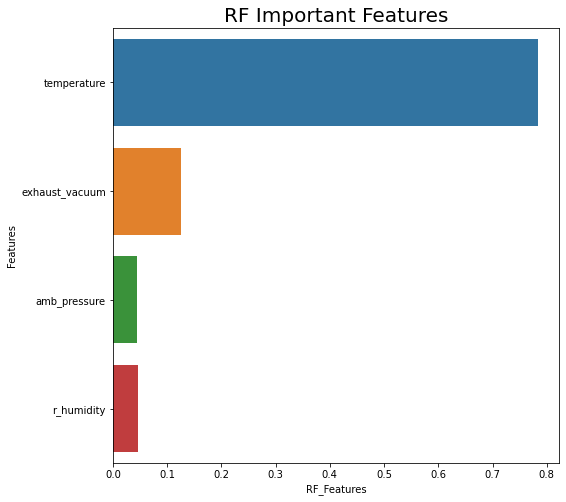

In [155]:
plt.figure(figsize=(8,8))
sns.barplot(x='RF_Features',y='Features',data=feature_importance)
plt.title('RF Important Features',size = 20)
plt.show()